#DESCRIPTION 
---
In this dataset, we predict the price of house. This dataset has prices of house along with the factors that has an impact on the House price. 

We have used libraries like pandas, numpy, matplotlib, seaborn, sklearn, tensorflow etc. to help understand the data exploration, cleaning and visualization.

In [82]:
#Importing basic libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [83]:
#Loading the dataset
bh = pd.read_csv("/content/drive/MyDrive/BostonHousing.csv")
bh.sample(5)

#Target variable is "medv"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
190,0.09068,45.0,3.44,0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10,37.0
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


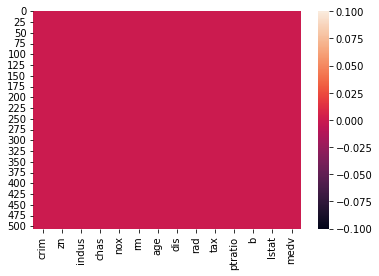

In [84]:
#Check null values
print(bh.isnull().sum())

#Visualisation
sns.heatmap(bh.isnull())
plt.show()

In [85]:
#Check datatypes
bh.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [86]:
#Check no. of rows and columns
bh.shape

(506, 14)

In [87]:
#Check description of the dataset
bh.describe()

#It seems that zn and chas are the important columns because it shows both conditional + categorical variables.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
#Select Input (features) and Output (target)
X = bh.drop('medv', axis = 1)
Y = bh['medv']

In [89]:
#Split the model into 70% Training data and 30% Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [90]:
#Apply Scaling : StandardScaler on 70% input Training data and 30% input Testing data
from sklearn.preprocessing import StandardScaler

#Create object
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#NOTE : fit_transform only uses in trianing data (fit means to train and then change) and transform only uses in testing data.
       #In testing data we only apply transform() coz we need only scaling on testing data not on training data.

In [91]:
#Create a Neural Network means Fully Connected Network
import tensorflow as tf    

#Create object of Sequential class
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 13, activation = 'relu', input_shape = (X.shape[1], )),         #Hidden Layer 1
           #Inputs from the Input Layer goes to the first Hidden Layer
           #Dense Layer means which is deeply / strongly connceted to each other very well means which is fully dependent on each other, #which is known as Fully Connected Network
        tf.keras.layers.Dense(units = 13, activation = 'relu'),           #Hidden Layer 2
        tf.keras.layers.Dense(units = 1, activation = 'linear')          #Output Layer
           #bydefault activation is 'linear', will predict continuous numerical value 
])

In [92]:
#Check summary
model.summary()

#Calculation of layers : params = no. of inputs * no. of neurons + no. of bias
#1. Hidden Layer 1 : 13 * 13 + 13 = 182 
#2. Hidden Layer 2 : 13 * 13 + 13 = 182 
#3. Output Layer   : 13 * 1 + 1   = 14

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 13)                182       
                                                                 
 dense_27 (Dense)            (None, 13)                182       
                                                                 
 dense_28 (Dense)            (None, 1)                 14        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [93]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mse')
#loss means error, mse : Mean Squared Error = sum(sqr(Y - Y_pred)) / N
#mse = 1 / N * (Y - Y_pred) ** 2
#We predict continuous numerical,  in this case evaluate of model with the help of mse
#by default learning_rate = 0.01, and in Adam we can change the learning_rate according to problem statement
#In Adam, we can give one record at a time or batch wise

In [94]:
#Train the model with 70% Training data and 30% Training data
trained_model = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2, verbose = 1)
#The object trained_model will keep history of loss and accuracy of Training as well as Testing in compile
#to check overfitting of model : validation_data = (X_test, Y_test) or validation_split = 0.2 means 20% data of training data
#by default verbose = 1 : which means it will show the values

Epoch 1/100
9/9 [==============================] - 1s 48ms/step - loss: 583.3396 - val_loss: 504.5794
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 573.1921 - val_loss: 495.1872
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 561.5203 - val_loss: 485.6723
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 549.9486 - val_loss: 475.1149
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 537.4089 - val_loss: 463.2194
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 523.7896 - val_loss: 450.0779
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 508.4929 - val_loss: 435.7504
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 491.8857 - val_loss: 420.0403
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 473.7503 - val_loss: 402.8536
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 454.2143 - val_los

In [95]:
#It shows that after 46th iteration, the model is overfitting means after 46 iteration the training error is less than testing error
#NOTE : we check in each iteration, if training_loss < testing_loss, then that means the model is Overfit

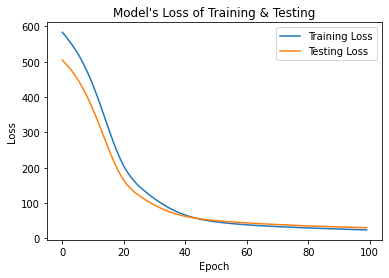

In [96]:
#Visualise Training Error (loss) and Testing Error (loss)
plt.plot(trained_model.history['loss'], label = 'Training Loss')
plt.plot(trained_model.history['val_loss'], label = 'Testing Loss')
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.show()

In [97]:
#Find the prediction means test the model 
Y_pred = model.predict(X_test)
Y_pred

array([[27.29059  ],
       [23.491676 ],
       [14.75925  ],
       [21.390074 ],
       [22.348457 ],
       [19.282753 ],
       [27.555056 ],
       [15.419318 ],
       [23.92219  ],
       [27.374462 ],
       [19.136723 ],
       [28.354517 ],
       [17.203964 ],
       [19.86145  ],
       [21.814915 ],
       [17.776052 ],
       [15.330455 ],
       [44.194874 ],
       [25.037373 ],
       [18.19795  ],
       [18.974945 ],
       [14.8662405],
       [24.75584  ],
       [25.49528  ],
       [28.552332 ],
       [13.441648 ],
       [10.382492 ],
       [18.401531 ],
       [38.275208 ],
       [18.989023 ],
       [25.071619 ],
       [ 7.5984898],
       [42.06494  ],
       [18.62889  ],
       [21.940498 ],
       [19.0128   ],
       [17.302574 ],
       [34.177002 ],
       [18.390627 ],
       [15.841308 ],
       [26.436216 ],
       [22.91446  ],
       [27.870277 ],
       [14.084383 ],
       [16.229599 ],
       [10.984748 ],
       [43.369568 ],
       [18.11

In [98]:
#Generate Report : 
#Find r2_score for evaluation of regression model
from sklearn.metrics import r2_score     
print("R2-Score : ", r2_score(Y_test, Y_pred))

R2-Score :  0.7737825362696333


In [99]:
#It is good score but we can do it more better 
#Reason behind less score : the model is Overfit

In [100]:
#To reduce Overfitting situation, apply Regularization
#Regularization is known as L2
#Create a Neural Network
from keras import regularizers

#Create object of Sequential class
model_1 = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units = 15, activation = 'relu', input_shape = (X.shape[1], ), kernel_regularizer = regularizers.l2(0.01)),        #Hidden Layer 1
             #l2(learning_rate = 0.01) : In Ridge, learning_rate is less
          tf.keras.layers.Dense(units = 15, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),          #Hidden Layer 2
          tf.keras.layers.Dense(units = 1, activation = 'linear', kernel_regularizer = regularizers.l2(0.01))       #Output Layer
])

In [101]:
#Compile the model 
model_1.compile(optimizer = 'adam', loss = 'mse')

In [102]:
#Train the model 
trained_model_1 = model_1.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_test, Y_test))

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 551.3510 - val_loss: 583.2972
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 537.3041 - val_loss: 568.4944
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 520.8203 - val_loss: 551.2147
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 501.5549 - val_loss: 529.6663
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 478.2060 - val_loss: 503.5507
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 450.8582 - val_loss: 472.7859
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 419.4819 - val_loss: 438.2444
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 384.4435 - val_loss: 399.3225
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 345.3128 - val_loss: 357.7284
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss

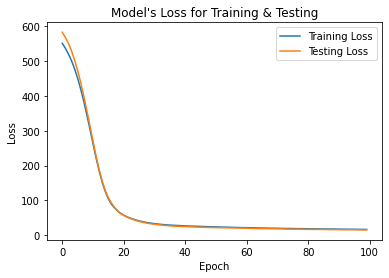

In [103]:
#Visualise Training Error (loss) and Testing Error (loss)
plt.plot(trained_model_1.history['loss'], label = "Training Loss")     
plt.plot(trained_model_1.history['val_loss'], label = "Testing Loss")
plt.title("Model's Loss for Training & Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [104]:
#Now, it shows that there's no distance between both so that means it reduced Overfitting situation

In [105]:
#Find the prediction means Test the model
Y_pred = model_1.predict(X_test)

In [106]:
#Generate Report : 
#Find r2_score for evaluation of regression model
print("R2_Score : ", r2_score(Y_test, Y_pred))

R2_Score :  0.8381540471665975


In [107]:
#86% is the good score, will apply Dropout

In [108]:
#Apply Dropout
#Create a Neural Network
from keras.layers import Dropout

#Create object of Sequential class
model_2 = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units = 1000, activation = 'relu', input_dim = 13), Dropout(0.50),       #Hidden Layer 1
            #Dropout(0.50) measn 50% neurons deactivate, it will drop out 50% of hidden and visible units of a network randomly to prevent overfitting of data
          tf.keras.layers.Dense(units = 1000, activation = 'relu'), Dropout(0.50),        #Hidden Layer 2 
          tf.keras.layers.Dense(units = 1000, activation = 'relu'), Dropout(0.50),        #Hidden Layer 3
          tf.keras.layers.Dense(units = 1, activation = 'linear')       #Output Layer
])

#NOTE : whenever we take Dropout then always increase the no. of neurons like 1000 or 2000, coz Dropout take amount of data and that data doesn't work

In [109]:
#Compile the model 
model_2.compile(optimizer = 'adam', loss = 'mse')

In [110]:
#Train the model 
trained_model_2 = model_2.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
9/9 [==============================] - 1s 41ms/step - loss: 310.0638 - val_loss: 131.3152
Epoch 2/100
9/9 [==============================] - 0s 29ms/step - loss: 60.8938 - val_loss: 45.6231
Epoch 3/100
9/9 [==============================] - 0s 28ms/step - loss: 34.7765 - val_loss: 27.9327
Epoch 4/100
9/9 [==============================] - 0s 29ms/step - loss: 31.6821 - val_loss: 26.1560
Epoch 5/100
9/9 [==============================] - 0s 30ms/step - loss: 25.9460 - val_loss: 24.5506
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 22.3034 - val_loss: 25.8359
Epoch 7/100
9/9 [==============================] - 0s 28ms/step - loss: 23.1318 - val_loss: 22.1130
Epoch 8/100
9/9 [==============================] - 0s 28ms/step - loss: 22.5935 - val_loss: 23.0706
Epoch 9/100
9/9 [==============================] - 0s 28ms/step - loss: 21.0051 - val_loss: 17.9195
Epoch 10/100
9/9 [==============================] - 0s 28ms/step - loss: 19.2384 - val_loss: 17.44

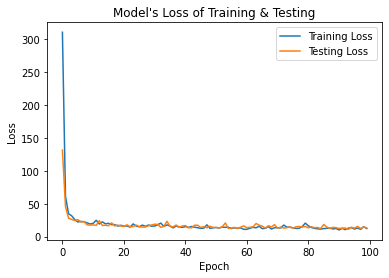

In [111]:
#Visualise Training Error (loss) and Testing Error (loss)
plt.plot(trained_model_2.history['loss'], label = "Training Loss")
plt.plot(trained_model_2.history['val_loss'], label = 'Testing Loss')     
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.show()

In [112]:
#Test the model
Y_pred = model_2.predict(X_test)

In [113]:
#Generate Report 
print("R2_Score : ", r2_score(Y_test, Y_pred))

R2_Score :  0.9168269207054577


In [114]:
#It is good that the accuracy increasing, so we'll apply Early Stopping

In [115]:
#Apply Early Stopping
model_3 = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units = 15, activation = 'relu', input_dim = 13),        #Hidden Layer 1
          tf.keras.layers.Dense(units = 15, activation = 'relu'),        #Hidden Layer 2
          tf.keras.layers.Dense(units = 1, activation = 'linear')        #Ouptut Layer
])

In [116]:
#Compile the model 
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [117]:
#Create Callback
from tensorflow.keras.callbacks import EarlyStopping 

callback = tf.keras.callbacks.EarlyStopping(
           monitor = 'val_loss', 
           min_delta = 0.00001, 
           patience = 20, 
           verbose = 1, 
           mode = 'auto', 
           baseline = None, 
           restore_best_weights = False
)

#A callback is a set of functions to be applied at given stages of the training procedure.

In [118]:
#Train the model
trained_model_3 = model_3.fit(X_train, Y_train, epochs = 3500, validation_split = 0.2, verbose = 1, callbacks = callback)

Epoch 1/3500
9/9 [==============================] - 1s 19ms/step - loss: 589.8262 - val_loss: 513.0579
Epoch 2/3500
9/9 [==============================] - 0s 4ms/step - loss: 580.7980 - val_loss: 505.0951
Epoch 3/3500
9/9 [==============================] - 0s 7ms/step - loss: 570.9597 - val_loss: 496.1310
Epoch 4/3500
9/9 [==============================] - 0s 5ms/step - loss: 559.8548 - val_loss: 485.3165
Epoch 5/3500
9/9 [==============================] - 0s 7ms/step - loss: 547.2548 - val_loss: 472.4107
Epoch 6/3500
9/9 [==============================] - 0s 5ms/step - loss: 532.5460 - val_loss: 457.6580
Epoch 7/3500
9/9 [==============================] - 0s 5ms/step - loss: 515.5239 - val_loss: 441.1846
Epoch 8/3500
9/9 [==============================] - 0s 6ms/step - loss: 497.0416 - val_loss: 422.8439
Epoch 9/3500
9/9 [==============================] - 0s 5ms/step - loss: 475.8948 - val_loss: 402.7681
Epoch 10/3500
9/9 [==============================] - 0s 5ms/step - loss: 452.6417

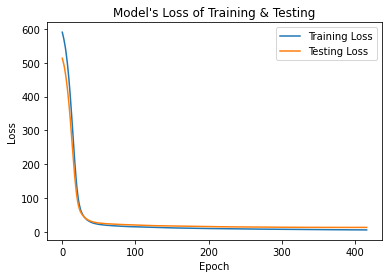

In [119]:
#Visualisation of Training & Testing Loss
plt.plot(trained_model_3.history['loss'], label = 'Training Loss')
plt.plot(trained_model_3.history['val_loss'], label = 'Testing Loss')
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.show()

In [120]:
#Test the model
Y_pred = model_3.predict(X_test)

In [121]:
#Generate Report
print("R2_Score : ", r2_score(Y_test, Y_pred))

R2_Score :  0.8944186899994586


#CONCLUSION : 
In this model, Dropout method is the best because it gives the 91% accuracy